In [639]:
import numpy as np
import cvxpy as cvx
import scipy.optimize as opt

In [640]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [641]:
x1 = np.array([-1.5,-0.5,-0.5,0.5,0.5,1.5,-1])
x2 = np.array([-0.5,-0.5,-1.5,0.5,1.5,0.5,0.8])
X = np.array([x1,x2]).T

In [642]:
# Solve SVM
q = cvx.Variable(2)
cvx_b = cvx.Variable(1)
objective = cvx.Minimize(1/2*cvx.norm(q)**2)
constraints = [cvx.mul_elemwise(y,X*q+cvx_b)>=1]
prob = cvx.Problem(objective,constraints)
result = prob.solve()
q = q.value.A1

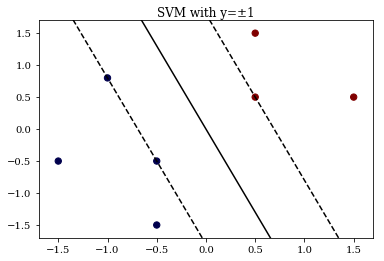

In [643]:
# Plot SVM
q1,q2 = q
b = cvx_b.value
plt.scatter(X[:,0],X[:,1],c=y,s=40*np.abs(y),cmap='seismic');
s = np.linspace(min(x1),max(x1),10)
plt.plot(s,1/q2*(-b-q1*s),'k')
plt.plot(s,1/q2*(-1-b-q1*s),'k--')
plt.plot(s,1/q2*(1-b-q1*s),'k--')
plt.axis(xmin=-1.7,xmax=1.7,ymax=1.7,ymin=-1.7)
plt.title('SVM with y=±1');

In [644]:
# Solve primal
r = np.array([-1,-2,-1,1,2,2,-2])
n = len(r)
risk_neutral = lambda x: x
exp_utility = lambda x: -cvx.exp(-5*x)
u = exp_utility
q = cvx.Variable(2)
cvx_b = cvx.Variable(1)
objective = cvx.Maximize(
    1/(1*n)*cvx.sum_entries(u(cvx.mul_elemwise(r,X*q+cvx_b))) -
    3*(cvx.norm(q)**2+cvx_b**2))
prob = cvx.Problem(objective)
prob.solve()
q = q.value.A1

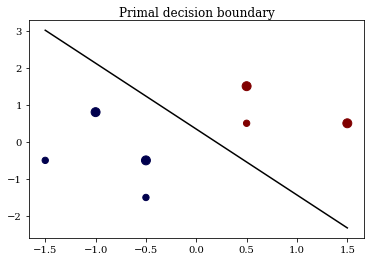

In [645]:
# Plot primal
q1,q2 = q
b = cvx_b.value
plt.scatter(X[:,0],X[:,1],c=np.where(r>0,1,-1),s=40*np.abs(r),cmap='seismic')
s = np.linspace(min(x1),max(x1),10)
plt.plot(s,1/q2*(-b-q1*s),'k');
plt.title('Primal decision boundary');

In [646]:
ker = lambda x,y: (np.inner(x,y) + 1)**2

In [647]:
# Solve dual
a = cvx.Variable(n)
ra = cvx.mul_elemwise(r,a)
xi = np.column_stack((X,np.ones(n)))
K = ker(xi,xi)
objective = -cvx.sum_entries(cvx.kl_div(a,1)) - cvx.quad_form(ra,K)
prob = cvx.Problem(cvx.Maximize(objective))
prob.solve()
a = a.value.A1

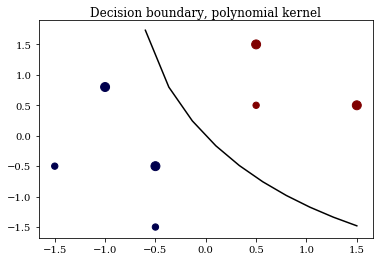

In [648]:
# Plot dual
plt.scatter(X[:,0],X[:,1],c=np.where(r>0,1,-1),s=40*np.abs(r),cmap='seismic');
s = np.linspace(-0.6,max(x1),10)
def f(x2,x1):
    x = np.array([x1,x2,1])
    phi = ker(xi,x)
    return np.inner(a*r,phi)
xx2 = [opt.brentq(f,-1.5,2,args=xx1) for xx1 in s]
plt.plot(s,xx2,'k');
plt.title('Decision boundary, polynomial kernel');